In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [37]:
tf.__version__

'2.4.1'

In [38]:
! pip install split-folders

## Easier way to split into train , test data

In [39]:
import splitfolders

# train, test split
splitfolders.ratio('../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/', output="./brain_tumor_dataset_split", ratio=(0.7, 0.3))

Copying files: 253 files [00:00, 767.71 files/s]


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [40]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('./brain_tumor_dataset_split/train',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 176 images belonging to 2 classes.


In [41]:
training_set.class_indices

{'no': 0, 'yes': 1}

In [42]:
yes=np.count_nonzero(training_set.classes)
print("Yes:",yes)
print("No:",176-yes)

Yes: 108
No: 68


### Preprocessing the Test set

In [43]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('brain_tumor_dataset_split/val/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 77 images belonging to 2 classes.


In [44]:
yes_test=np.count_nonzero(test_set.classes)
print("Yes:",yes_test)
print("No:",77-yes_test)

Yes: 47
No: 30


## Part 2 - Building the CNN

### Initialising the CNN

In [45]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=7, activation='relu', input_shape=[64,64,3]))

### Step 2 - Pooling

In [47]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [49]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [50]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [51]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [52]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [53]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Summary of the model

In [54]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 58, 58, 32)        4736      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

### Training the CNN on the Training set and evaluating it on the Test set

In [55]:
cnn.fit(x = training_set, epochs = 121 ,validation_data=test_set)

Epoch 1/121
6/6 [==============================] - 2s 188ms/step - loss: 0.6998 - accuracy: 0.4553 - val_loss: 0.6124 - val_accuracy: 0.6234
Epoch 2/121
6/6 [==============================] - 1s 144ms/step - loss: 0.6576 - accuracy: 0.6170 - val_loss: 0.6076 - val_accuracy: 0.6623
Epoch 3/121
6/6 [==============================] - 1s 145ms/step - loss: 0.6079 - accuracy: 0.6371 - val_loss: 0.5613 - val_accuracy: 0.7013
Epoch 4/121
6/6 [==============================] - 1s 152ms/step - loss: 0.5345 - accuracy: 0.7170 - val_loss: 0.5644 - val_accuracy: 0.7662
Epoch 5/121
6/6 [==============================] - 1s 139ms/step - loss: 0.6002 - accuracy: 0.6837 - val_loss: 0.5276 - val_accuracy: 0.7532
Epoch 6/121
6/6 [==============================] - 1s 141ms/step - loss: 0.5569 - accuracy: 0.6751 - val_loss: 0.5360 - val_accuracy: 0.7403
Epoch 7/121
6/6 [==============================] - 1s 156ms/step - loss: 0.5650 - accuracy: 0.7385 - val_loss: 0.5328 - val_accuracy: 0.7532
Epoch 8/121
6

### Train accuracy

In [56]:
cnn.evaluate(training_set)

6/6 [==============================] - 1s 93ms/step - loss: 0.0343 - accuracy: 0.9943


[0.03425988554954529, 0.9943181872367859]

### Test accuracy 

In [57]:
cnn.evaluate(test_set)

3/3 [==============================] - 0s 49ms/step - loss: 1.1180 - accuracy: 0.8571


[1.1179713010787964, 0.8571428656578064]

## Part 4 - Making single predictions

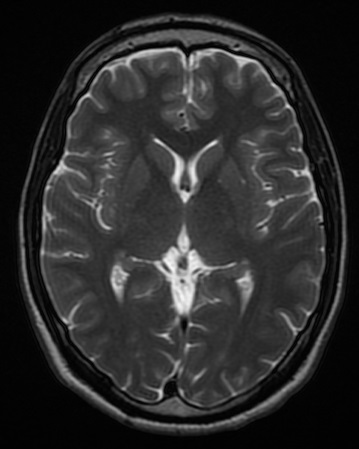

Actual: No
Predicted: No


In [58]:
import numpy as np
from tensorflow.keras.preprocessing import image


from IPython.display import display, Image
display(Image(filename='./brain_tumor_dataset_split/val/no/No22.jpg'))
test_image = image.load_img('./brain_tumor_dataset_split/val/no/No22.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

print("Actual: No")
print("Predicted:", prediction)

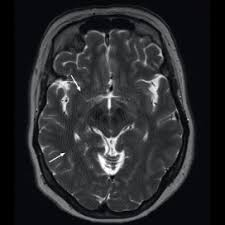

Actual: No
Predicted: No


In [59]:
import numpy as np
from tensorflow.keras.preprocessing import image


from IPython.display import display, Image
display(Image(filename='./brain_tumor_dataset_split/val/no/3 no.jpg'))
test_image = image.load_img('./brain_tumor_dataset_split/val/no/39 no.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

print("Actual: No")
print("Predicted:", prediction)

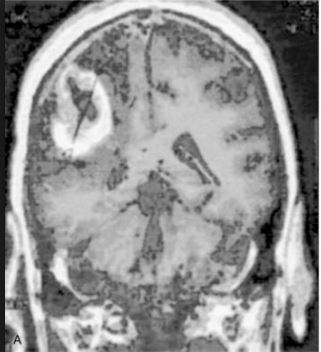

Actual: Yes
Predicted: Yes


In [60]:
import numpy as np
from tensorflow.keras.preprocessing import image


from IPython.display import display, Image
display(Image(filename='./brain_tumor_dataset_split/val/yes/Y147.JPG'))
test_image = image.load_img('./brain_tumor_dataset_split/val/yes/Y147.JPG', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

print("Actual: Yes")
print("Predicted:", prediction)

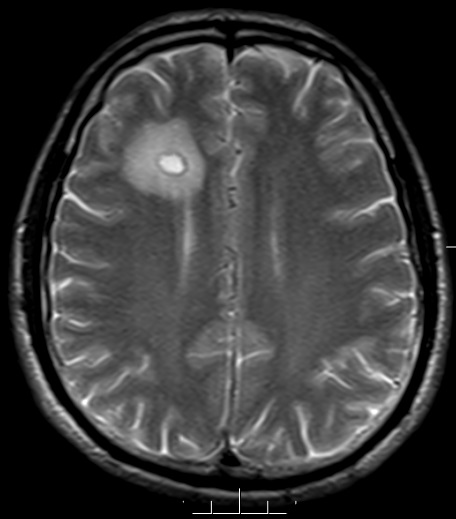

Actual: Yes
Predicted: Yes


In [61]:
import numpy as np
from tensorflow.keras.preprocessing import image


from IPython.display import display, Image
display(Image(filename='./brain_tumor_dataset_split/val/yes/Y3.jpg'))
test_image = image.load_img('./brain_tumor_dataset_split/val/yes/Y3.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

print("Actual: Yes")
print("Predicted:", prediction)